In [4]:
import numpy as np
import geopandas as gpd
from shapely.geometry import Polygon, MultiPolygon, Point
import pandas as pd
from matplotlib import pyplot as plt
from shapely import wkt
from geopandas import GeoDataFrame

In [5]:
CABA = pd.read_csv('datos/poligono capital.csv')
CABA.rename(columns ={'WKT': 'geometry'},inplace = True)
CABA.head()

,geometry,BARRIO,COMUNA,PERIMETRO,AREA
0,"POLYGON ((-58.4528200492791 -34.5959886570639,...",CHACARITA,15.0,7725.695228,3.118101e+06
1,"POLYGON ((-58.4655768128541 -34.5965577078058,...",PATERNAL,15.0,7087.513295,2.229829e+06
2,"POLYGON ((-58.4237529813037 -34.5978273383243,...",VILLA CRESPO,15.0,8132.699348,3.613584e+06
3,"POLYGON ((-58.4946097568899 -34.6148652395239,...",VILLA DEL PARQUE,11.0,7705.389797,3.399596e+06
4,"POLYGON ((-58.4128700313089 -34.6141162515854,...",ALMAGRO,5.0,8537.901368,4.050752e+06


In [3]:
def obtener_poligono(multi):
    l =[]
    for x in multi.split(')'):
        poligono = []
        for y in x.split(','):
            if 'MULTIPOLYGON ' in y:
                y = y.replace('MULTIPOLYGON ', '')
            if 'POLYGON ' in y:
                y = y.replace('POLYGON ', '')
            if '(' in y:
                y = y.replace('(', '')
            if len(y) < 5:
                continue
            lon, lat = y.split()
            poligono.append((float(lon), float(lat)))
        l.append(Polygon(poligono))
    return MultiPolygon(l)

In [7]:
CABA.loc[:,'geometry'] = CABA.loc[:,'geometry'].apply(lambda x: obtener_poligono(x))

In [8]:
CABA.head()

,geometry,BARRIO,COMUNA,PERIMETRO,AREA
0,(POLYGON ((-58.4528200492791 -34.5959886570639...,CHACARITA,15.0,7725.695228,3.118101e+06
1,(POLYGON ((-58.4655768128541 -34.5965577078058...,PATERNAL,15.0,7087.513295,2.229829e+06
2,(POLYGON ((-58.4237529813037 -34.5978273383243...,VILLA CRESPO,15.0,8132.699348,3.613584e+06
3,(POLYGON ((-58.4946097568899 -34.6148652395239...,VILLA DEL PARQUE,11.0,7705.389797,3.399596e+06
4,(POLYGON ((-58.4128700313089 -34.6141162515854...,ALMAGRO,5.0,8537.901368,4.050752e+06


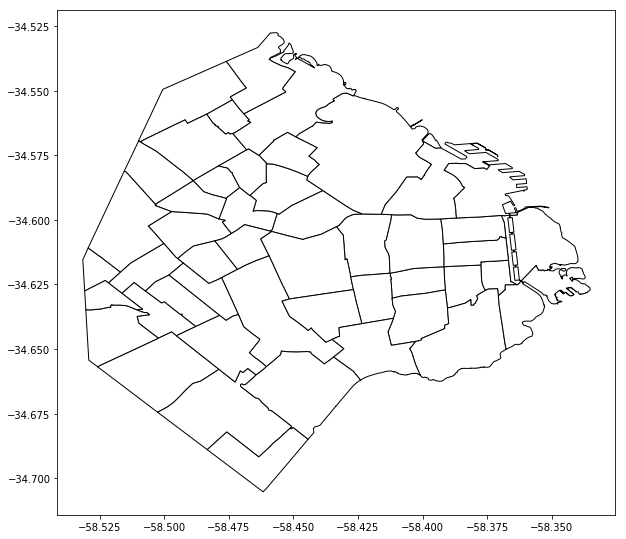

In [10]:
geoData = GeoDataFrame(CABA)
geoData.plot(color='white', edgecolor='black',figsize=(10,10))
plt.show()

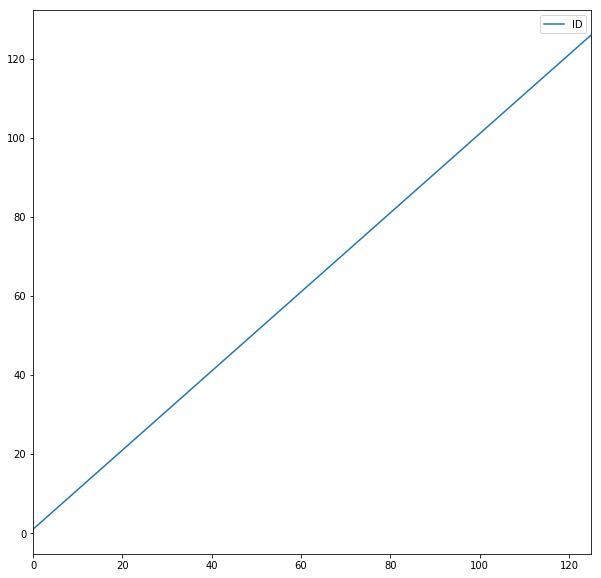

In [22]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_aspect('equal')

caba.plot(ax=ax, color='white', edgecolor='black')

inu.plot(ax=ax, color='red', markersize=5)
plt.show();

In [15]:
geoData.contains(Point(-58.516100,-34.589408)).any()

True

In [16]:
geoData.contains(Point(58.516100,-34.589408)).any()

False